**PRÁCTICA 4. CCNs CON KERAS PARA LA CLASIFICACIÓN DE IMÁGENES**

**Conceptos necesarios de teoría**:
Keras, Métricas performance, CIFAR10, Conectar con Drive, One-hot enconding,  Detectar overfitting, learning rate (decay - nesterov - momentum), leer imágen con openCV, cambio BGR->RGB, matplotlib.

Despues de trabajar durante las dos prácticas anteriores con la librería de bajo nivel denominada TensorFlow, en la presente práctica se va a introducir un framework de alto nivel para el entrenamiento de redes neuronales denominado **Keras**. Esta librería fue desarrollada por **François Chollet** en 2015 con el objetivo de **simplificar la programación de algoritmos basados en aprendizaje profundo** ofreciendo un conjunto de abstracciones más intuitivas y de alto nivel. Keras hace uso de librerías de más bajo nivel o ***backend*** por detrás, concretamente se puede escoger entre **TensorFlow,  Microsoft Cognitive Toolkit o Theano**. Durante las sesiones prácticas que restan en el siguiente curso haremos uso de la librería Keras con TensorFlow como backend.

**EJERCICIO 1.** En primer lugar y con el objetivo de familiarizarnos con esta nueva librería, el primer ejercicio consistirá en replicar la última versión de la red neuronal profunda de la práctica anterior **empleando Keras**.  Si recordaís  el objetivo que perseguía la práctica anterior era el de **clasificar el dataset de dígitos manuscritos denominado MNIST**, así que vamos a ello:

- **Analiza el siguiente código con atención** y **busca en la [documentación de Keras](https://keras.io/)** cada una de las funciones que se utilizan. No pases al siguiente apartado hasta que no tener **totalmente claro** cada uno de los **comandos** que se emplean y los **parámetros de entrada** de dichas funciones.

- **Ejecuta el proceso de entrenamiento de la red**. Posteriormente **añade capas de dropout (manteniendo el 50% de las neuronas de cada capa) despues de cada una de las *hidden layers*** y vuelve a lanzar la red. Busca en la documentación de Keras como añadir la capa de Dropout.

- Realiza de nuevo estas dos pruebas cambiando el optimizador **SGD por Adam**. ¿Que configuración es la que mejores resultados proporciona sin mostrar signos de overfitting? **Sol.** La mejor configuración resultante es SGD sin droput ya que Adam sin dropout ofrece mejor precisión pero muestras signos de overfitting.

Using TensorFlow backend.


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

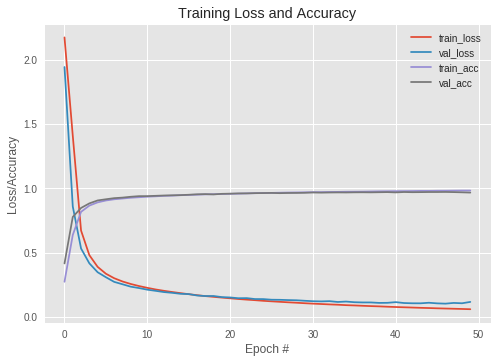

In [0]:
# Imports necesarios
import numpy as np
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Importamos el dataset MNIST y cargamos los datos
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Implementamos la red empleando Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(200, activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(100, activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(60, activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(30, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Compilamos y entrenamos el modelo SGD
print("[INFO]: Entrenando red neuronal...")
model.compile(loss="categorical_crossentropy", optimizer=SGD(0.005), metrics=["accuracy"])
H = model.fit(mnist.train.images, mnist.train.labels, validation_data=(mnist.validation.images, mnist.validation.labels), epochs=50, batch_size=128)

# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(mnist.test.images, batch_size=128)
print(classification_report(mnist.test.labels.argmax(axis=1), predictions.argmax(axis=1)))

# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()



---



**EJERCICIO 2.** A continuación vamos a trabajar con un dataset un poco más complejo, **[CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html)**. Dicho conjunto de datos se compone de **60000 imágenes RGB** de dimensiones **32x32** pertenecientes a **10 clases distintas** (6000 imágenes por clase). CIFAR10 se separa en dos subconjuntos de datos: **50000** imágenes para **entrenamiento** y las **10000** restantes se emplean como set de **test**. 


In [0]:
# Importando el set de datos CIFAR10
from keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]
# Por si es necesario convertir a one-hot encoding
#lb = LabelBinarizer()
#trainY = lb.fit_transform(trainY)
#testY = lb.transform(testY)

Using TensorFlow backend.


[INFO] loading CIFAR-10 data...


Ahora que tenemos en memoria el set de datos CIFAR10, lo primero que debemos hacer es **mostrar unas cuantas imágenes** para visualizar la **variabilidad** existente:

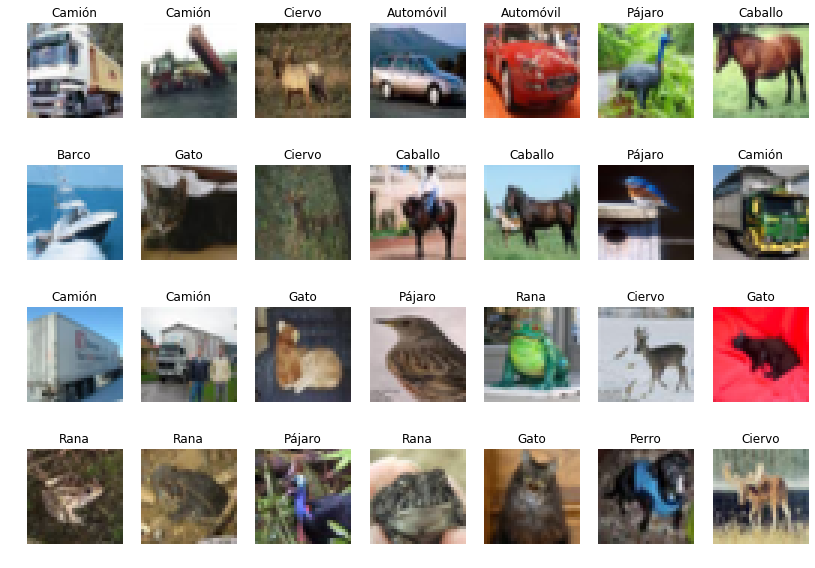

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = trainX[n]
    plt.imshow(img)
    plt.title(labelNames[trainY[n][0]])
    plt.axis('off')

1. Entrena una red perceptron multicapa con dos capas ocultas (la primera de ellas de **1024** neuronas y la segunda de **512**). Emplea como función de activación **ReLU** y **SGD** como optimizador con una tasa de aprendizaje **```lr = 0.01```**. Como función de pérdidas utilizaremos ***categorical crossentropy***. Entrenad la red con valores de **```epochs = 50```** y **```batch_size = 32```**.

2. En caso de que la red no alcance una buena precisión prueba a dotarla de más profundidad. Concretamente incluye cinco capas ocultas con **2048, 1024, 512, 128 y 32** neuronas, respectivamente. Comente los resultados comparando ambas arquitecturas de red. En caso de que se evidencien signos de overfitting realiza una **segunda ejecución de esta arquitectura** incluyendo una capa de **dropout** tras cada *hidden layer*. ¿Que sucede? **Sol.** Ni con la arquitectura de 1 ni de 2 se obtienen buenos resultados. Val_acc no pasa de 0.55 lo ni con una ni con otra arquitectura lo que significa que una MLP no es suficiente para hacer frente a este problema de clasificación que se antoja más complejo que MNIST. Ni con el dropout mejoramos, en validación no hay forma de aprender. Es necesario una técnica más avanzada, i.e. CNNs 

**Nota.** Prestad atención a como se cargan los datos, en caso de que se carguen  etiquetas en decimal se deberá emplear el método **```sparse_categorical_crossentropy```** o en su caso utilizar el obejto **LabelBinarizer** de la librería **ScikitLearn** para convertir las etiquetas a one hot encoding (i.e. etiquetas binarias) y poder emplear como función objetivo **```categorical_crossentropy```**. Busca en la documentación las diferencias entre ambos métodos y explicalas. Además el tipo de datos de nuestras etiquetas también hay que tenerlo en cuenta cuando hagamos uso del método **```classification_report```** para obtener las métricas de evaluación de nuestro modelo.

In [0]:
# Imports necesarios
import numpy as np
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# Pasamos los datos a vector con la función reshape
trainX = trainX.reshape((trainX.shape[0], 3072)) #(X)
testX = testX.reshape((testX.shape[0], 3072)) #(X)

# Arquitectura de red
# Definimos el modo API Sequential
model = Sequential() #(X)
# Primera capa oculta
model.add(Dense(1024,input_shape=(3072,), activation="relu")) 
model.add(Dense(1024, input_dim=3072, activation="relu")) #(X)
#model.add(Dropout(0.5))
# Segunda capa oculta
model.add(Dense(512, activation="relu")) #(X)
#model.add(Dropout(0.5))
# Capa de salida
model.add(Dense(10, activation="softmax")) #(X)


# Compilamos el modelo y entrenamos
print("[INFO]: Entrenando red neuronal...")
# Compilamos el modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"]) # Etiquetas en decimal #(X)
# model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"]) # Etiquetas binarias #(X)
# Entrenamos el perceptrón multicapa
H = model.fit(trainX, trainY, validation_split=0.2, epochs=50, batch_size=32) #(X)

# Evaluamos con las muestras de test
print("[INFO]: Evaluando modelo...")
# Efectuamos predicciones
predictions = model.predict(testX, batch_size=32) #(X)
# Obtenemos el report
print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas en decimal #(X)
# print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas binarias

# Mostramos gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


[INFO]: Entrenando red neuronal...
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 292us/step - loss: 1.8717 - acc: 0.3239 - val_loss: 1.6760 - val_acc: 0.3964
Epoch 2/50
50000/50000 [==============================] - 14s 278us/step - loss: 1.6505 - acc: 0.4094 - val_loss: 1.6141 - val_acc: 0.4205
Epoch 3/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.5567 - acc: 0.4446 - val_loss: 1.6941 - val_acc: 0.4076
Epoch 4/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.4903 - acc: 0.4673 - val_loss: 1.5938 - val_acc: 0.4400
Epoch 5/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.4398 - acc: 0.4850 - val_loss: 1.4456 - val_acc: 0.4824
Epoch 6/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.3950 - acc: 0.5040 - val_loss: 1.4526 - val_acc: 0.4774
Epoch 7/50
50000/50000 [==============================] - 14s 280us/step - loss: 

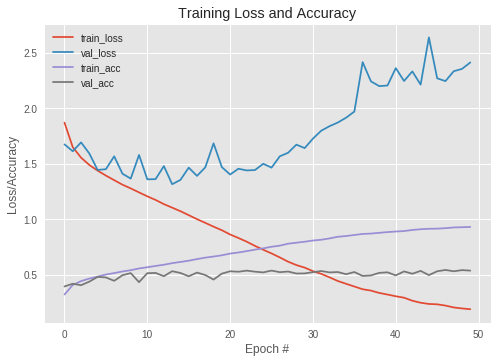

In [0]:
# Imports necesarios
import numpy as np
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# Pasamos los datos a vector con la función reshape
trainX = trainX.reshape((trainX.shape[0], 3072)) #(X)
testX = testX.reshape((testX.shape[0], 3072)) #(X)

# Arquitectura de red
# Definimos el modo API Sequential
model = Sequential() #(X)
# Primera capa oculta
model.add(Dense(2048, input_shape=(3072,), activation="relu")) #(X)
#model.add(Dropout(0.5))
# Segunda capa oculta
model.add(Dense(1024, activation="relu")) #(X)
#model.add(Dropout(0.5))
# Tercera capa oculta
model.add(Dense(512, activation="relu")) #(X)
#model.add(Dropout(0.5))
# Cuarta capa oculta
model.add(Dense(128, activation="relu")) #(X)
#model.add(Dropout(0.5))
# Quinta capa oculta
model.add(Dense(32, activation="relu")) #(X)
# Capa de salida
model.add(Dense(10, activation="softmax")) #(X)


# Compilamos el modelo y entrenamos
print("[INFO]: Entrenando red neuronal...")
# Compilamos el modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"]) # Etiquetas en decimal #(X)
# model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"]) # Etiquetas binarias #(X)
# Entrenamos el perceptrón multicapa
H = model.fit(trainX, trainY, validation_split=0.2, epochs=50, batch_size=32) #(X)

# Evaluamos con las muestras de test
print("[INFO]: Evaluando modelo...")
# Efectuamos predicciones
predictions = model.predict(testX, batch_size=32) #(X)
# Obtenemos el report
print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas en decimal #(X)
# print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas binarias

# Mostramos gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()




---



Tal y como hemos visto en la sesión teórica, en la mayoría de problemas de clasificación de imagen, no es suficiente con crear un modelo de predicción basado en un perceptron multicapa. Para problemas de cierta dificultad, este tipo de arquitectura no ofrece una solución precisa. Por este motivo se propusieron las **redes neuronales convolucionales**. Dichas arquitecturas de red **extraen la información relevante automáticamente** de la imagen por medio de la operación convolución de manera local (en la práctica dicha operación es la correlación cruzada). 

**EJERCICIO 3.** En el siguiente ejercicio vamos a desarrollar **nuestra primera red neuronal convolucional** y entrenarla sobre el **conjunto de datos CIFAR10**. Para ello, vamos a definir en el método ```shallow_CNN(width, heigh, depth, classes)```una arquitectura de red formada por **un único bloque convolucional** compuesto por una capa convolucional (**Conv2D** en Keras) de **32 filtros 3x3** empleando **```padding="same"```** y  la función de activación **ReLu**. Posteriormente, **estiraremos el volumen** resultante y lo llevaremos a una **capa de salida** compuesta por **10 neuronas**. Como se ha detallado en la sesión teórica, Keras tiene dos métodos distintos para implementar la arquitectura de red: el secuencial y el funcional. Implementa esta primera red convolucional utilizando el **método secuencial**. De nuevo emplea **SGD** como optimizador con una tasa de aprendizaje **```lr = 0.01```**. Como función de pérdidas utilizaremos ***categorical crossentropy*** (para etiquetas binarias o decimales según el caso). Entrenad la red con valores de **```epochs = 50```** y **```batch_size = 32```**. ¿Se produce una mejora sustancial con respecto a la arquitectura perceptrón multicapa? ¿Que crees que necesita nuestra CNN? **Sol.** No mejora mucho, concretamente 0.06 - 0.08 puntos de precisión. Es necesario dotar a nuestra CNN de mayor profundidad. 

**Nota.** Emplear el padding necesario para que las dimensiones del mapa de activación tras la capa convolucional se mantengan intactas.

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.8205 - acc: 0.3598 - val_loss: 1.6538 - val_acc: 0.4251
Epoch 2/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.5663 - acc: 0.4575 - val_loss: 1.4865 - val_acc: 0.4780
Epoch 3/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.4063 - acc: 0.5104 - val_loss: 1.3695 - val_acc: 0.5174
Epoch 4/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.3122 - acc: 0.5415 - val_loss: 1.3437 - val_acc: 0.5129
Epoch 5/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.2575 - acc: 0.5594 - val_loss: 1.3473 - val_acc: 0.5263
Epoch 6/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.2207 - acc: 0.5719 - val_loss: 1.2896 - val_acc: 0.5345
Epoch 7/50
50000/50000 [==============================]

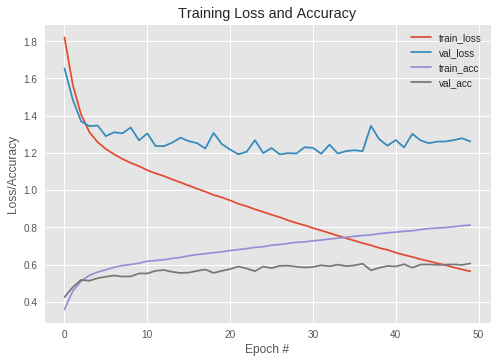

In [0]:
# import the necessary packages
import numpy as np
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras import backend as K

def shallow_CNN(width, height, depth, classes):
  # Definimos el modo API Sequential y las dimensiones de la entrada (suponemos TF->"channels last")
  model = Sequential() #(X)
  inputShape = (height, width, depth) #(X)
  # Definir la arquitectura
  # Capa convolucional
  model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=inputShape)) #(X)
  # Clasificación
  # Estiramos el volumen de activación a un vector
  model.add(Flatten()) #(X)
  # Añadimos capa de salida
  model.add(Dense(classes, activation="softmax")) #(X)
  # La función debe devolver el modelo como salida
  return model #(X)

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
# Instanciamos el modelo ajustado al dataset CIFAR10
model = shallow_CNN(width=32, height=32, depth=3, classes=10) #(X)
# Compilamos el modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(lr=0.01), metrics=["accuracy"]) #(X)

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H = model.fit(trainX, trainY, validation_split=0.2, batch_size=32, epochs=50, verbose=1) #(X)

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model.predict(testX, batch_size=32) #(X)
# Sacamos el report para test
print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames)) #(X)

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

De los resultados extraidos del apartado anterior se puede observar que para separar los datos de CIFAR10 en las distintas clases que lo componen requerimos de un **mayor número de bloques convolucionales**. Cuando esto sucede es necesario **introducir capas de pooling** entre bloques convolucionales sucesivos con el objetivo de reducir las dimensiones espaciales de un bloque al siguiente a la vez que aumenta el número de mapas de activación.

**EJERCICIO 4.** A continuación vamos a construir una **arquitectura** más avanzada **compuesta por dos bloques convolucionales (*base model*) y un bloque destinado a la clasificación (*top model*)** tal y como se muestra en la imagen siguiente:

![CNN_CIFAR10](https://drive.google.com/uc?id=1c6InWMDMmfRQ5B4HB-Eb59Z7pTwpy7eL)

Codifica la arquitectura de la figura anterior en una función definida como:

> >>>>>```deep_CNN(width, height, depth, classes, batchNorm)```

El parámetro de entrada **```batchNorm```** debe ser una **bandera** a partir de la cual se aplique la técnica de **Batch Normalization** en los lugares indicados en la arquitectura en el caso que ```batchNorm=True```. En caso contrario no se aplicará dicha técnica. En este ejercicio **SE DEBE** emplear la **API funcional de Keras** para crear la arquitectura. Cabe destacar que en esta ocasión al tratarse de una red con mayor profundidad vamos a aplicar la técnica de **learning rate decay** y **nesterov acceleration** con valores **```decay=lr/epochs```** y **```momentum=0.9```**, respectivamente.  

- Ejecutad el entrenamiento con valores de **```epochs = 50```** y **```batch_size = 64```**. ¿Que se pueden decir ahora sobre los resultados de clasificación?¿Existe alguna diferencia entre la ejecución con ```batchNorm=True``` y ```batchNorm=False```?  **Sol.** Hemos encontrado una arquitectura que discrimina con una buena precisión entre las 10 clases de CIFAR10. La ejecución aplicando batchNormalization disminuye un el pequeño efecto de overfitting que se evidencia al no aplicar dicha técnica.

**Nota 1.** Emplear el padding necesario para que las dimensiones del mapa de activación tras cualquier capa convolucional se mantengan intactas.

**Nota 2.** La fase de **entrenamiento** en este ejercicio ya empieza a consumir un **tiempo considerable** de la sesión. Es por ello, que con tal de evitar que tengaís que volver a realizar el entrenamiento en caso de cierre insesperado del navegador o cualquier otro error **GUARDAD el modelo** una vez entrenado en un directorio de vuestro Google Drive (i.e. **/My Drive/Curso_CFP_DL/P4/Models**). Para montar Google Drive en vuestro código en Colab leed las trasparencias de la sesión teórica. Para almacenar el modelo entrenado emplead la fúncion de Keras **```mymodel.save(path)```** (no sin antes leer la documentación de la misma)


[INFO]: Compilando el modelo...
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
[INFO]: Entrenando la red...
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 25s 510us/step - loss: 1.6383 - acc: 0.4536 - val_loss: 1.1776 - val_acc: 0.5805
Epoch 2/50
50000/50000 [==============================] - 23s 463us/step - loss: 1.1504 - acc: 0.6015 - val_loss: 0.9471 - val_acc: 0.6688
Epoch 3/50
50000/50000 [==============================] - 23s 460us/step - loss: 0.9537 - acc: 0.6686 - val_loss: 0.8359 - val_acc: 0.7070
Epoch 4/50
50000/50000 [==============================] - 23s 459us/step - loss: 0.8422 - acc: 0.7060 - val_loss: 0.7743 - val_acc: 0.7252
Epoch 5/50
50000/50000 [==============================] - 23s 456us/step - loss: 0.7727 - acc: 0.7305 - val_loss: 0.7045 - val_acc: 0.7537
Epoch 6/50
50000/50000 [==============================] - 23s 459us/step - loss

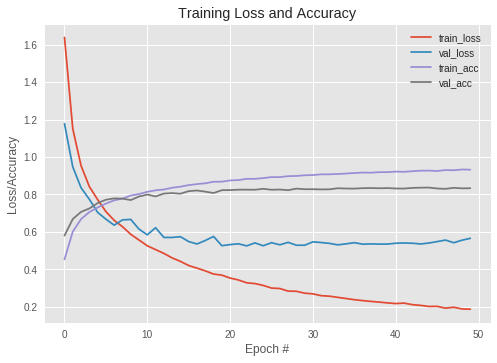

In [0]:
# import the necessary packages
import numpy as np
from keras import backend as K
from keras.layers.convolutional import Conv2D
from keras.layers import Input
from keras.models import Model
from keras.layers.core import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive

def deep_CNN(width, height, depth, classes, batchNorm):
  
  # Definimos entradas en modo "channels last"
  inputs = Input(shape=(height, width, depth)) #(X)
    
  # Definimos la arquitectura
  # Primer set de capas CONV => RELU => CONV => RELU => POOL
  x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs) #(X)
  if batchNorm: 
    x1 = BatchNormalization()(x1) #(X)
  x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1) #(X)
  if batchNorm:
    x1 = BatchNormalization()(x1) #(X)
  x1 = MaxPooling2D(pool_size=(2, 2))(x1) #(X)
  x1 = Dropout(0.25)(x1) #(X)
  
  # Segundo set de capas CONV => RELU => CONV => RELU => POOL
  x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1) #(X)
  if batchNorm: #(X)
    x2 = BatchNormalization()(x2) #(X)
  x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2) #(X)
  if batchNorm:
    x2 = BatchNormalization()(x2) #(X)
  x2 = MaxPooling2D(pool_size=(2, 2))(x2) #(X)
  x2 = Dropout(0.25)(x2) #(X)
  
  # Primer (y único) set de capas FC => RELU
  xfc = Flatten()(x2) #(X)
  xfc = Dense(512, activation="relu")(xfc) #(X)
  if batchNorm:
    xfc = BatchNormalization()(xfc) #(X)
  xfc = Dropout(0.5)(xfc) #(X)
  # Clasificador softmax
  predictions = Dense(classes, activation="softmax")(xfc) #(X)
  
  # Unimos las entradas y el modelo mediante la función Model con parámetros inputs y ouputs (Consultar la documentación)
  model = Model(inputs=inputs, outputs=predictions) #(X)
  
  # La función debe devolver el modelo como salida           
  return model

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
# Instanciamos el modelo ajustado al dataset CIFAR10
model = deep_CNN(width=32, height=32, depth=3, classes=10, batchNorm=True) #(X)
# Compilamos el modelo
model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(lr=0.01, decay=0.01/50, momentum=0.9, nesterov=True), metrics=["accuracy"]) #(X)

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H = model.fit(trainX, trainY, validation_split=0.2, batch_size=64, epochs=50, verbose=1) #(X)

# Almaceno el modelo en Drive
# Montamos la unidad de Drive
drive.mount('/content/drive') #(X)
# Almacenamos el modelo empleando la función mdoel.save de Keras
model.save("/content/drive/My Drive/Curso_DL_CFP/Modelos/deepCNN_CIFAR10_P4.h5") #(X)

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
predictions = model.predict(testX, batch_size=64) #(X)
# Sacamos el report para test
print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames)) #(X)

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()



```
# Tiene formato de código
```

**EJERCICIO 5.** Por último, vamos a **desarrollar un método** que a partir de un modelo de predicción ya entrenado y **una imagen de test**, muestre la misma por pantalla incluyendo **la clase a la que pertenece** y el **nivel de confianza** que ofrece el modelo en dicha predicción en el título de la figura. Para ello, comprobad si existe la variable que contenía el modelo anterior (```if 'model' not in locals():```) y en caso negativo cargad el modelo anteriormente almacenado en Drive empleando el comando de Keras **load_model(path)**. La cabecera de la función será la siguiente:

>>>>>> ```def predict_image(image, model, gt_str):```

Cabe destacar que el tercer parámetro de entrada **```gt_str```** es una **cadena de texto** que valdrá CIFAR10 en caso que estemos prediciendo imágenes de dicho set de datos (por defecto) y el String con el *ground-truth* en caso de que estemos prediciendo imágenes externas (siguiente ejercicio).
**Ejecutad** dicho método entre **10-15 veces** variando la imagen a testear de las del **conjunto de test de CIFAR10**. ¿Que puedes decir sobre el éxito en la predicción del modelo generado? **Sol.** El modelo se comporta muy muy bien prediciendo imagenes del conjunto de test de CIFAR10.

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


W0704 19:40:04.451195 140187756533632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 19:40:04.475547 140187756533632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 19:40:04.502733 140187756533632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0704 19:40:04.503667 140187756533632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0704 19:40:04.507436 140187756

[INFO]: Clasificando imagen...
[[2.3884337e-07 1.4217703e-09 9.9437057e-07 2.5870730e-03 1.7277279e-07
  9.9741095e-01 2.1675773e-07 3.6156808e-07 4.9731068e-09 1.1247027e-08]]


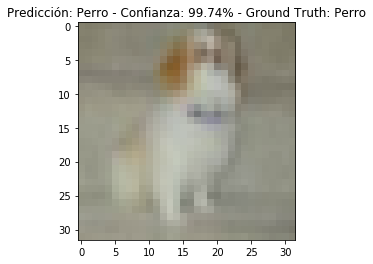

In [0]:
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np
from google.colab import drive
from keras.models import load_model

def predict_image(image, model, gt_str="CIFAR10"):
  # Creamos una copia sobre la que mostraremos el resultado (comando image.copy())
  output = image.copy() #(X)
  # Expandimos las dimensiones (32, 32, 3) a (1, 32, 32, 3)
  image = np.expand_dims(image, axis=0) #(X)

  # Clasificación de la imagen empleando el modelo
  print("[INFO]: Clasificando imagen...")
  # Realizamos la predicción
  proba = model.predict(image) #(X)
  print(proba)
  # Nos quedamos con la clase que presente una probabilidad mayor y buscamos la etiqueta en el vector labelNames
  idx = np.argmax(proba) #(X)
  label = labelNames[idx] #(X)
  gt = labelNames[testY[num_img][0]] #(X)
  # En caso que en la variable gt_str no me pasen el string "CIFAR10" es que me estan pasando el string con la etiqueta
  # Si ese es el caso almaceno el gt de ese String (esto nos valdrá para predecir imágenes que no sean del dataset CIFAR10)
  if gt_str != "CIFAR10":
    gt = gt_str #(X)

  # Mostrando imagen e información
  label = "Predicción: {} - Confianza: {:.2f}% - Ground Truth: {}".format(label, proba[0][idx] * 100, gt)
  plt.imshow(output)
  plt.title(label)
  plt.show()

# Escogemos una imagen de test al azar tal y como se hizo al principio de la práctica anterior
# para mostrar numeros de MNIST aleatoriamente (consultala si es necesario)
num_img = np.random.randint(0, testX.shape[0]) #(X)
img = testX[num_img] #(X)
if 'model' not in locals():
  # Montamos la unidad de Drive
  drive.mount('/content/drive') #(X)
  # Cargamos el modelo empleando la función load_model
  model = load_model("/content/drive/My Drive/Curso_DL_CFP/Modelos/deepCNN_CIFAR10_P4.h5") #(X)
# Predecimos la imagen pasando como parámetros la imagen, el modelo
predict_image(img, model) #(X)

A continuación, cread un directorio en vuestro Google Drive (i.e. **/My Drive/Curso_CFP_DL/P4/Imagenes**) y almacenad diferentes imágenes obtenidas bien de Internet o de vuestras colecciones de imágenes personales (unas 10 imágenes). Empleando OPENCV leed una imagen del directorio y efectuar la predicción empleando el método anterior. Ahora el ground truth no lo teneís directamente disponible por lo que deberéis modificar la función para pasarle un String que contenga la etiqueta solución.

Predecid las 10 imágenes almacenadas en vuestro Google Drive, ¿Que puedes decir sobre el **éxito en la predicción del modelo** generado sobre **imágenes NO pertenecientes** al dataset **CIFAR10**?¿A que cree que puede ser debido este fenómeno?¿Que soluciones deberiamos adoptar para mejorar la precisión en la clasificación?

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(388, 646, 3)


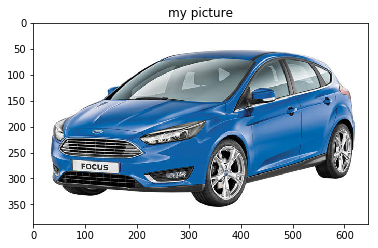

[INFO]: Clasificando imagen...
[[1.1986786e-07 9.9999952e-01 2.4760782e-13 6.1696687e-10 8.5311407e-13
  2.5592077e-13 3.3426022e-07 9.6486699e-12 7.8679957e-10 2.4049850e-08]]


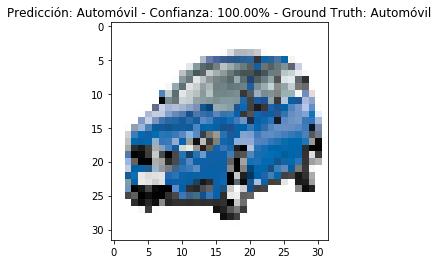

In [0]:
from google.colab import drive

# Montamos la unidad de Drive
drive.mount('/content/drive') #(X)

# Selecciono imagen y la leo con OPENCV
img_path = "/content/drive/My Drive/Curso_DL_CFP/Imagenes/focus.jpg" # Path de Drive donde tengo la imagen (incluido el nombre de la misma) #(X)
img_test = cv2.imread(img_path, cv2.IMREAD_COLOR) # Leo imagen con OPENCV
img_test = cv2.cvtColor(img_test,cv2.COLOR_BGR2RGB) # Por defecto la carga en BGR, la convierto a RGB

# Muestro información de la imagen y hago la predicción sacando resultados
print(img_test.shape)
plt.imshow(img_test)
plt.title('my picture')
plt.show()

# Pre-procesamos tal y como he hecho para la fase de entrenamiento con las muestras de CIFAR10
img_test = img_test.astype("float") / 255.0 #(X)
# Re-escalamos la imagen al tamaño con el que fue entrenada la red (comando cv2.resize)
img_test_res = cv2.resize(img_test, (32, 32)) #(X)
# Predecimos la imagen pasando como parámetros a la función predict_image: la imagen, el modelo y string con el GT
predict_image(img_test_res, model, "Automóvil")#(X)